In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

In [2]:
df= pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [4]:
df.shape

(2000, 26)

In [5]:
df['cap_shape'].value_counts()

cap_shape
sunken     439
flat       402
bell       397
convex     381
conical    381
Name: count, dtype: int64

In [6]:
df['cap_surface'].value_counts()

cap_surface
scaly      568
smooth     513
fibrous    482
grooves    437
Name: count, dtype: int64

In [7]:
df['cap_color'].value_counts()

cap_color
brown     263
green     241
yellow    228
gray      226
pink      221
buff      220
red       216
white     200
purple    185
Name: count, dtype: int64

In [8]:
df['bruises'].value_counts()

bruises
yes    1023
no      977
Name: count, dtype: int64

In [9]:
df['odor'].value_counts()

odor
foul        274
anise       242
musty       239
fishy       228
spicy       226
pungent     212
almond      203
creosote    197
none        179
Name: count, dtype: int64

In [10]:
df['gill_attachment'].value_counts()

gill_attachment
free          540
notched       535
attached      487
descending    438
Name: count, dtype: int64

In [11]:
df['gill_spacing'].value_counts()

gill_spacing
distant    677
close      664
crowded    659
Name: count, dtype: int64

In [12]:
df['gill_size'].value_counts()

gill_size
narrow    1007
broad      993
Name: count, dtype: int64

In [13]:
df['gill_color'].value_counts()

gill_color
orange       216
black        192
green        183
purple       173
pink         168
buff         165
chocolate    161
gray         160
brown        152
yellow       151
white        148
red          131
Name: count, dtype: int64

In [14]:
df['stalk_shape'].value_counts()

stalk_shape
enlarging    1040
tapering      960
Name: count, dtype: int64

In [15]:
df['stalk_root'].value_counts()

stalk_root
bulbous        336
cup            311
club           309
missing        294
rooted         266
rhizomorphs    252
equal          232
Name: count, dtype: int64

In [16]:
df['stalk_surface_above_ring'].value_counts()

stalk_surface_above_ring
fibrous    555
silky      513
smooth     466
scaly      466
Name: count, dtype: int64

In [17]:
df['stalk_surface_below_ring'].value_counts()

stalk_surface_below_ring
silky      522
scaly      502
fibrous    496
smooth     480
Name: count, dtype: int64

In [18]:
df['stalk_color_above_ring'].value_counts()

stalk_color_above_ring
brown       271
orange      251
pink        231
gray        218
yellow      215
red         214
white       211
cinnamon    203
buff        186
Name: count, dtype: int64

In [19]:
df['stalk_color_below_ring'].value_counts()

stalk_color_below_ring
orange      259
yellow      254
pink        233
buff        224
brown       221
white       213
red         210
gray        200
cinnamon    186
Name: count, dtype: int64

In [20]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [21]:
df['veil_type'].value_counts()

veil_type
universal    1010
partial       990
Name: count, dtype: int64

In [22]:
df['veil_color'].value_counts()

veil_color
white     553
brown     548
yellow    453
orange    446
Name: count, dtype: int64

In [23]:
df['ring_number'].value_counts()

ring_number
one     689
none    665
two     646
Name: count, dtype: int64

In [24]:
df['ring_type'].value_counts()

ring_type
sheathing     305
cobwebby      248
large         247
flaring       246
none          243
pendant       239
zone          237
evanescent    235
Name: count, dtype: int64

In [25]:
df['spore_print_color'].value_counts()

spore_print_color
brown        255
black        250
green        248
purple       230
yellow       219
white        205
orange       205
chocolate    196
buff         192
Name: count, dtype: int64

In [26]:
df['population'].value_counts()

population
abundant     360
clustered    340
several      335
solitary     332
numerous     323
scattered    310
Name: count, dtype: int64

In [27]:
df['habitat'].value_counts()

habitat
urban      316
woods      295
meadows    294
leaves     293
waste      280
paths      275
grasses    247
Name: count, dtype: int64

In [28]:
df['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [29]:
df['stalk_height'].value_counts()

stalk_height
2.000000     10
9.825972      8
8.173811      8
3.846000      7
11.814241     7
             ..
13.453058     1
2.462044      1
6.146856      1
10.732907     1
13.066414     1
Name: count, Length: 973, dtype: int64

In [30]:
df['cap_diameter'].value_counts()

cap_diameter
3.111415     8
4.988930     8
19.868822    7
18.708607    7
22.788126    7
            ..
23.894319    1
17.800033    1
20.966023    1
19.427505    1
21.056642    1
Name: count, Length: 976, dtype: int64

In [31]:
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

### Dropping Unnamed: 0 column

In [32]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [33]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


#### Box plots 

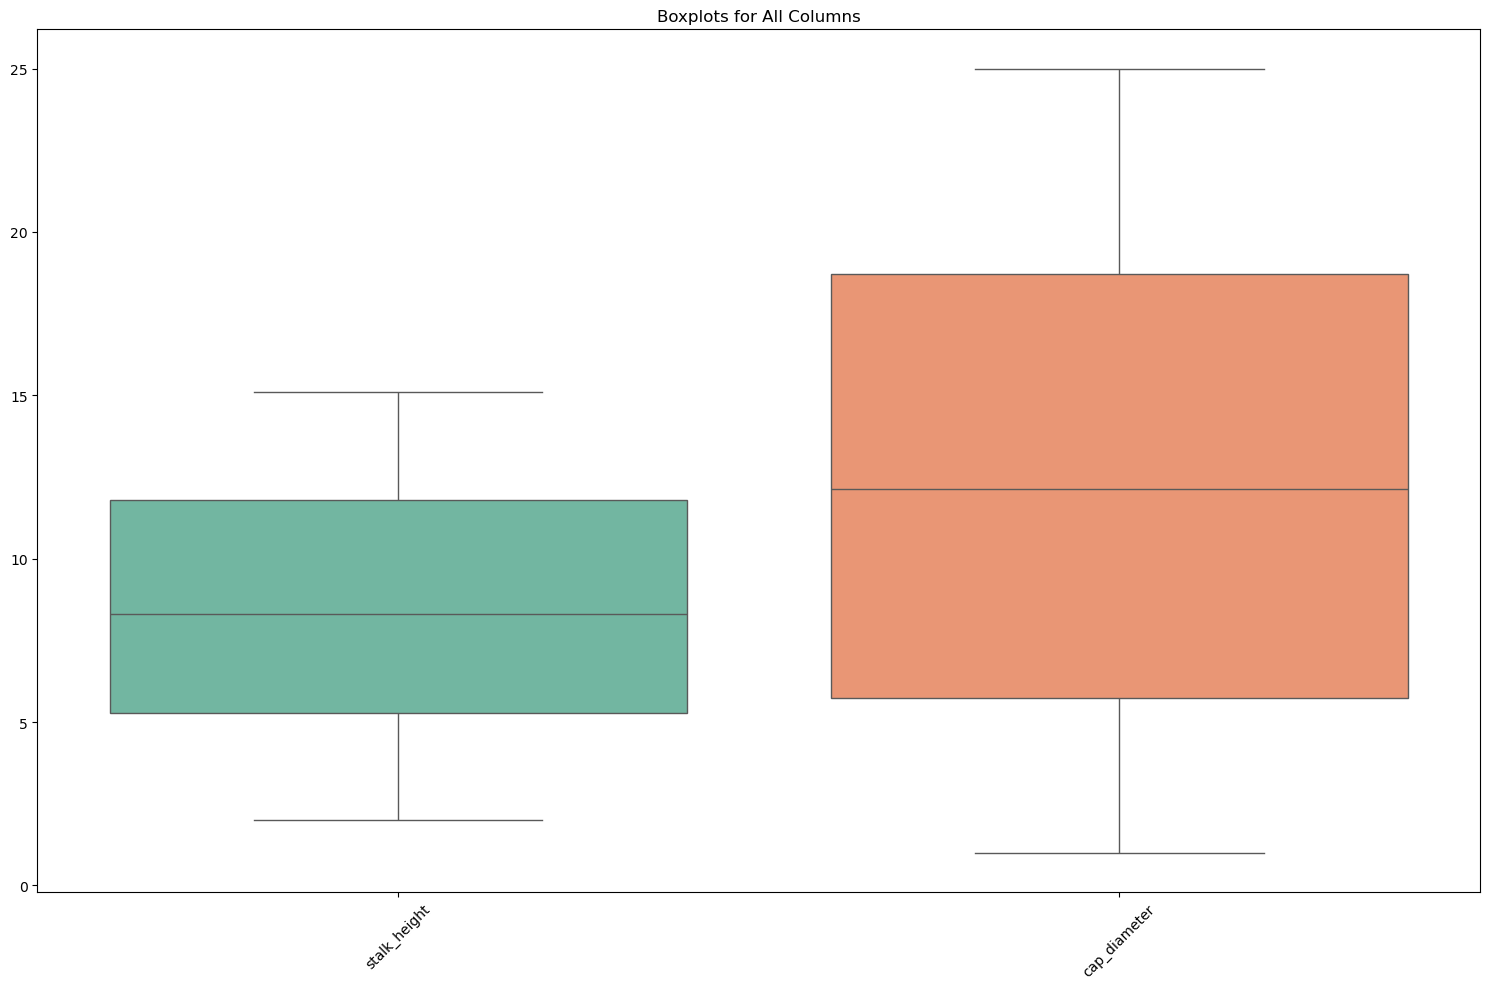

In [35]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create boxplots for all columns
sns.boxplot(data=df, palette='Set2')  # Use a color palette for better visualization

# Add title and labels
plt.title('Boxplots for All Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

#### Encode categorical variables 

In [36]:
# Exclude the last two columns
columns_to_encode = df.columns[:-2]

In [37]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [38]:
# Dictionary to store mappings
mappings = {}

In [39]:
# Apply Label Encoding to selected columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [40]:
# Display the mappings
print("\nMappings:")
for column, mapping in mappings.items():
    print(f"{column}: {mapping}")


Mappings:
cap_shape: {'bell': 0, 'conical': 1, 'convex': 2, 'flat': 3, 'sunken': 4}
cap_surface: {'fibrous': 0, 'grooves': 1, 'scaly': 2, 'smooth': 3}
cap_color: {'brown': 0, 'buff': 1, 'gray': 2, 'green': 3, 'pink': 4, 'purple': 5, 'red': 6, 'white': 7, 'yellow': 8}
bruises: {'no': 0, 'yes': 1}
odor: {'almond': 0, 'anise': 1, 'creosote': 2, 'fishy': 3, 'foul': 4, 'musty': 5, 'none': 6, 'pungent': 7, 'spicy': 8}
gill_attachment: {'attached': 0, 'descending': 1, 'free': 2, 'notched': 3}
gill_spacing: {'close': 0, 'crowded': 1, 'distant': 2}
gill_size: {'broad': 0, 'narrow': 1}
gill_color: {'black': 0, 'brown': 1, 'buff': 2, 'chocolate': 3, 'gray': 4, 'green': 5, 'orange': 6, 'pink': 7, 'purple': 8, 'red': 9, 'white': 10, 'yellow': 11}
stalk_shape: {'enlarging': 0, 'tapering': 1}
stalk_root: {'bulbous': 0, 'club': 1, 'cup': 2, 'equal': 3, 'missing': 4, 'rhizomorphs': 5, 'rooted': 6}
stalk_surface_above_ring: {'fibrous': 0, 'scaly': 1, 'silky': 2, 'smooth': 3}
stalk_surface_below_ring: {

In [41]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


#### Data Type conversion

In [42]:
columns_to_convert = df.columns[:-2]

In [43]:
# Convert the selected columns to 'category' data type
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [44]:
# Check the data types
print(df.dtypes)

cap_shape                   category
cap_surface                 category
cap_color                   category
bruises                     category
odor                        category
gill_attachment             category
gill_spacing                category
gill_size                   category
gill_color                  category
stalk_shape                 category
stalk_root                  category
stalk_surface_above_ring    category
stalk_surface_below_ring    category
stalk_color_above_ring      category
stalk_color_below_ring      category
veil_type                   category
veil_color                  category
ring_number                 category
ring_type                   category
spore_print_color           category
population                  category
habitat                     category
class                       category
stalk_height                 float64
cap_diameter                 float64
dtype: object


#### Dropping stalk_height & cap_diameter columns                                 

In [45]:
df.drop('stalk_height', axis=1, inplace=True)

In [46]:
df.drop('cap_diameter', axis=1, inplace=True)

In [47]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,2,6,3,1,5,1
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,2,6,1,2,5,0
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,2,6,6,0,5,1
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,2,0,4,1,0,1
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,0,4,8,1,4,1


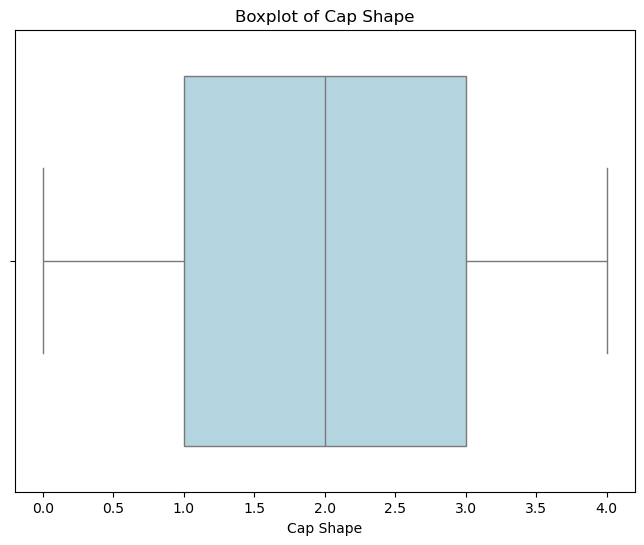

In [48]:
# Create a boxplot for a single column (e.g., 'cap_shape')
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df['cap_shape'], color='lightblue')  # Boxplot for 'cap_shape'

# Add title and labels
plt.title('Boxplot of Cap Shape')
plt.xlabel('Cap Shape')

# Show the plot
plt.show()

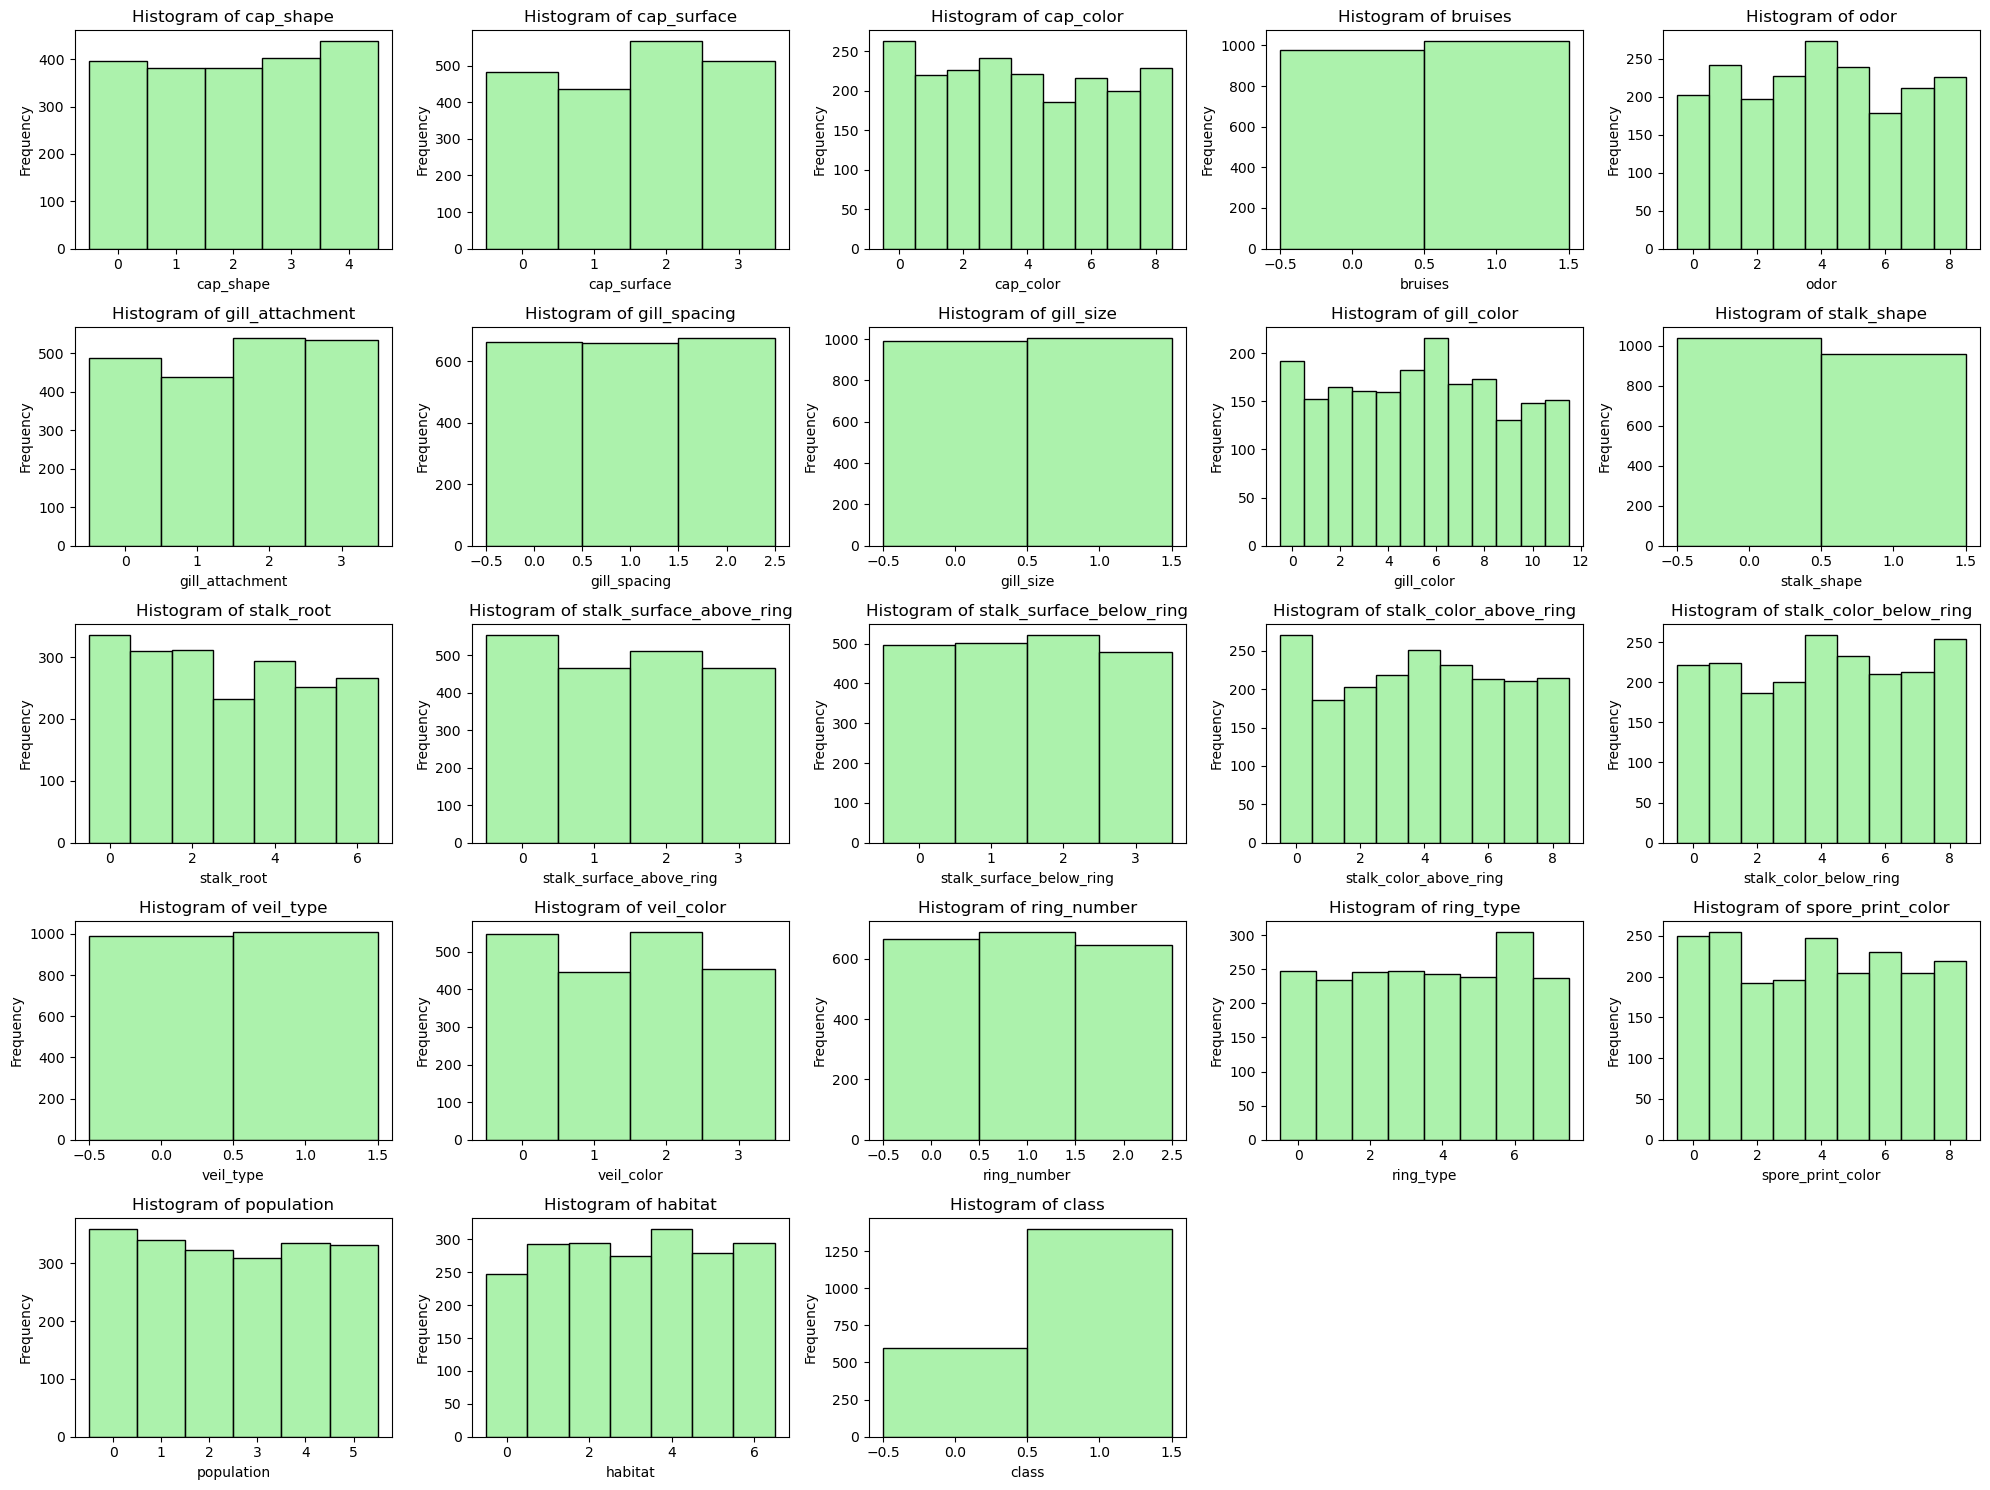

In [49]:
plt.figure(figsize=(20, 15))

# Loop through each column and create subplots
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 5, i)  # Adjust the grid size (5x5) based on the number of columns
    
    # Histogram
    sns.histplot(df[column], color='lightgreen', bins=10, kde=False)  # Remove KDE for simplicity
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [50]:
# We an see that the most of the features are balanced but Class category looks a littele imbalanced

In [51]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,2,6,3,1,5,1
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,2,6,1,2,5,0
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,2,6,6,0,5,1
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,2,0,4,1,0,1
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,0,4,8,1,4,1


### Data Visualization

#### Scatter Plots

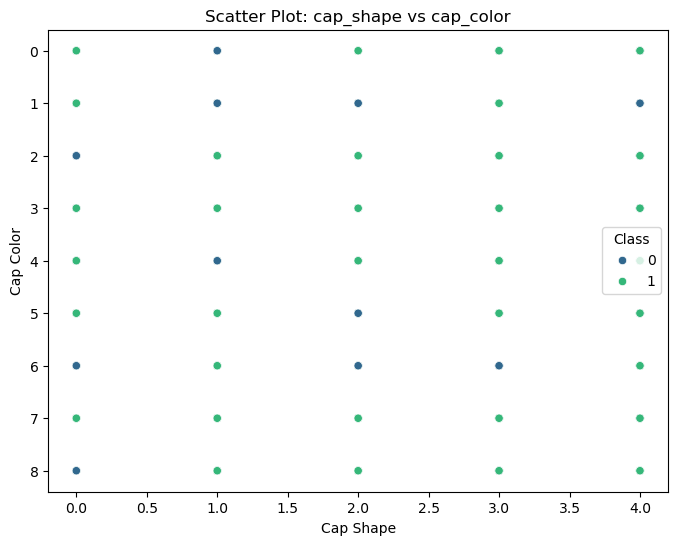

In [52]:
# Scatter plot between 'cap_shape' and 'cap_color'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cap_shape', y='cap_color', hue='class', data=df, palette='viridis')
plt.title('Scatter Plot: cap_shape vs cap_color')
plt.xlabel('Cap Shape')
plt.ylabel('Cap Color')
plt.legend(title='Class')
plt.show()

In [53]:
df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

#### Visualize Class Distribution

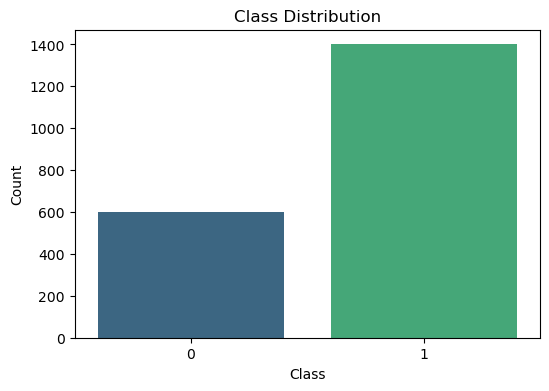

In [54]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='viridis', hue='class', legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Class Distribution (Pie Chart)

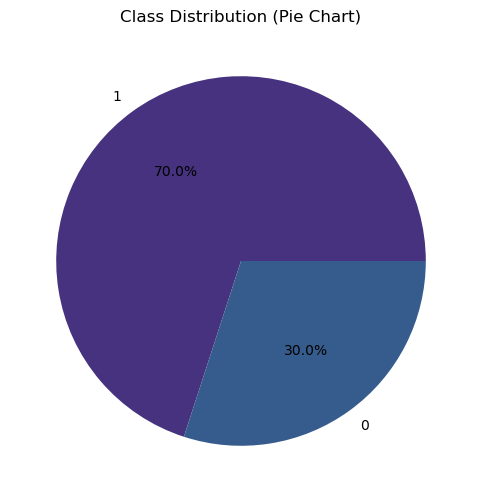

In [55]:
# Class distribution (pie chart)
class_counts = df['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Class Distribution (Pie Chart)')
plt.show()

#### Split the dataset into training and testing sets.

In [56]:
# Separate features (X) and target (y)
X = df.drop('class', axis=1)  # Features (all columns except 'class')
y = df['class']  # Target variable ('class')# Separate features (X) and target (y)


In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (1400, 22)
Testing features shape: (600, 22)
Training target shape: (1400,)
Testing target shape: (600,)


In [59]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

In [60]:
# Train the model
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [61]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [62]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.6916666666666667


### Handling IMbalanced Dataset

In [64]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution
print(pd.Series(y_resampled).value_counts())

class
0    985
1    985
Name: count, dtype: int64


### Parameter Tuning and Optimization

In [65]:
# Create an SVM classifier
svm_classifier1 = SVC(kernel='linear')

In [66]:
# Train the model
svm_classifier1.fit(X_resampled, y_resampled)

SVC(kernel='linear')

In [67]:
# Make predictions on the test set
y_pred1 = svm_classifier1.predict(X_test)
y_pred1

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [68]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred1))

Accuracy Score:
0.6183333333333333


In [69]:
# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]                  # Degree of the polynomial kernel (only for 'poly')
}

In [70]:
# Initialize the SVM classifier
svm_classifier_para = SVC(random_state=42)

In [ ]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_classifier_para, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)  # Use the resampled data after SMOTE

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


In [ ]:
# Make predictions on the test set using the best model
y_pred2 = grid_search.predict(X_test)


In [ ]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))